LEAD SCORING CASE STUDY

Let's import the data set provided and perform EDA

In [3]:
#import required packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')
plt.style.use("ggplot")

Import the Leads file

In [5]:
lead_data = pd.read_csv("Leads.csv")

#view the dataset
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [7]:
#view the rows and columns of lead data
lead_data.shape

(9240, 37)

Data Cleaning & Handling Missing Values

In [9]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [13]:
#Find sum of each coloumns have missing or null value
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
#find the percentage of missing values in each column
lead_data_percent=lead_data.isnull().sum()/lead_data.shape[0]*100
lead_data_percent

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [17]:
#check if value is displyed for categorical columns
for col in lead_data.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(lead_data[col].value_counts(normalize= True))
    print("_________________________________________________________________________________________________")

Lead Origin
_________________________________________________________________________________________________
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64
_________________________________________________________________________________________________
Lead Source
_________________________________________________________________________________________________
Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.00

In [19]:
#Few categorical column shows value as'Select' seems like the lead missed to select the required values from drop-down
#Lets replace these Select as NaN
lead_data = lead_data.replace('Select', np.nan)

In [21]:
#Find sum of each coloumns have missing or null value
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [23]:
#Drop columns having more than 70% null values

lead_data = lead_data.drop(lead_data.loc[:,list(round(lead_data.isnull().sum()/lead_data.shape[0], 2)>0.70)].columns, axis=1)

In [25]:
#Find sum of each coloumns have missing or null value
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [27]:
#find the columns of which missing values percentage is greater than 40
lead_data_miss=lead_data_percent[lead_data_percent>=40]
lead_data_miss

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

Review the Lead Data Dictionary and see check the five columns and determine how important are these for our analysis.
If found unimportant, drop the columns.

Lead Quality can't be dropped as it will help us in this anaysis, however the other 4 columns can me dropped as they shows many variations.

In [29]:
#Drop Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score
lead_data = lead_data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1)


In [31]:
#view the rows and columns of lead data
lead_data.shape

(9240, 31)

In [33]:
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [35]:
# Listing the categorical variables
lead_data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Do Not Email                                   9240 non-null   object
 4   Do Not Call                                    9240 non-null   object
 5   Last Activity                                  9137 non-null   object
 6   Country                                        6779 non-null   object
 7   Specialization                                 5860 non-null   object
 8   What is your current occupation                6550 non-null   object
 9   What matters most to you in choosing a course  6531 non-null   

In [37]:
#imputing missing values in Lead Quality column
#categorical column
lead_data["Lead Quality"].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [39]:
# As the Lead Quality depends upons the intuition of the employee, it will be safer to update the NaN to "Not Sure"

lead_data['Lead Quality'] = lead_data['Lead Quality'].replace(np.nan, 'Not Sure')

In [41]:
#imputing missing values in Tags column
#categorical column
lead_data["Tags"].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [43]:
# As majority of Tags are mentioned as "Will revert after reading the email", update the NaN to "Will revert after reading the email"

lead_data['Tags'] = lead_data['Tags'].replace(np.nan, 'Will revert after reading the email')

We can see that multiple columns are with values Yes or No. Let us assign Yes=1 and No=0

In [48]:
# Converting the values with yes/no labels
for attributes in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    lead_data[attributes] = lead_data[attributes].apply(lambda x : 1 if x=='Yes' else 0)
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Through Recommendations Receive More Updates About Our Courses  \
0                       0                                      0   
1                       0                                      0   
2                       0                                      0   
3                       0                                      0   
4                       0                                      0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content  Get updates on DM Content    City  \
0                                 0                          0     NaN   
1                                 0                          0     NaN   
2                                 0                          0  Mumbai   
3                                 0                          0  Mumbai   
4                                 0                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 31 columns]

In [50]:
#Checking for the null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [52]:
#imputing missing values in City column
#categorical column
lead_data["City"].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [54]:
# As majority of City are mentioned as 'Mumbai', update the NaN to "Mumbai"

lead_data['City'] = lead_data['City'].replace(np.nan, 'Mumbai')

In [56]:
#imputing missing values in Specialization column
#categorical column
lead_data["Specialization"].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [58]:
#Top 3 specializations have no much difference. So, let us map NaN to new value called'Other'
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Other')

In [60]:
#imputing missing values in 'What matters most to you in choosing a course' column
#categorical column
lead_data["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [62]:
# As majority of values are mentioned as 'Better Career Prospects', update the NaN to "Better Career Prospects"

lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [64]:
#imputing missing values in What is your current occupation column
#categorical column
lead_data["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [68]:
# As majority of values are mentioned as Unemployed, update the NaN to "Unemployed"

lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [70]:
#imputing missing values in Country column
#categorical column
lead_data["Country"].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [72]:
# As majority of Country are mentioned as India, update the NaN to "India"

lead_data['Country'] = lead_data['Country'].replace(np.nan, 'India')

In [74]:
#Checking for the null values as per current status
lead_data.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                            

In [76]:
# Remaining null values are negligible, so let's drop them
lead_data.dropna(inplace=True)

lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Through Recommendations Receive More Updates About Our Courses  \
0                       0                                      0   
1                       0                                      0   
2                       0                                      0   
3                       0                                      0   
4                       0                                      0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content  Get updates on DM Content    City  \
0                                 0                          0  Mumbai   
1                                 0                          0  Mumbai   
2                                 0                          0  Mumbai   
3                                 0                          0  Mumbai   
4                                 0                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 31 columns]

In [78]:
#Checking for the null values as per current status
lead_data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

We have cleared out the null values from the data provided

EXPLORATORY DATA ANAYSIS

In [82]:
#Let's begin with target variable 'Converted'
lead_data["Converted"].value_counts(normalize=True)

Converted
0    0.621446
1    0.378554
Name: proportion, dtype: float64

Zero represents the non-converted count and 1 represents the converted count

Text(0.5, 1.0, 'TARGET VALUE GRAPH')

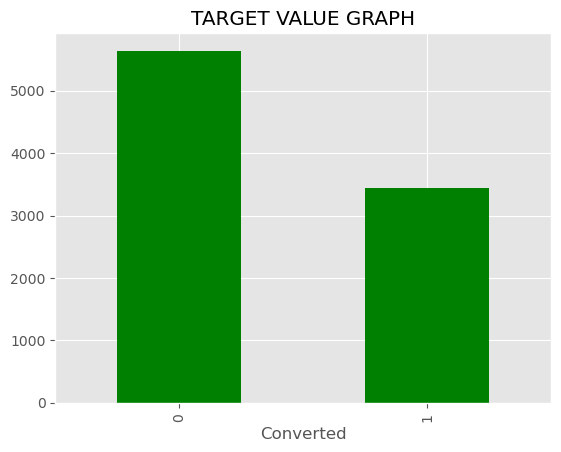

In [89]:
lead_data["Converted"].value_counts().plot.bar(color="Green")
plt.title('TARGET VALUE GRAPH')

Zero represents not converted, One represents converted

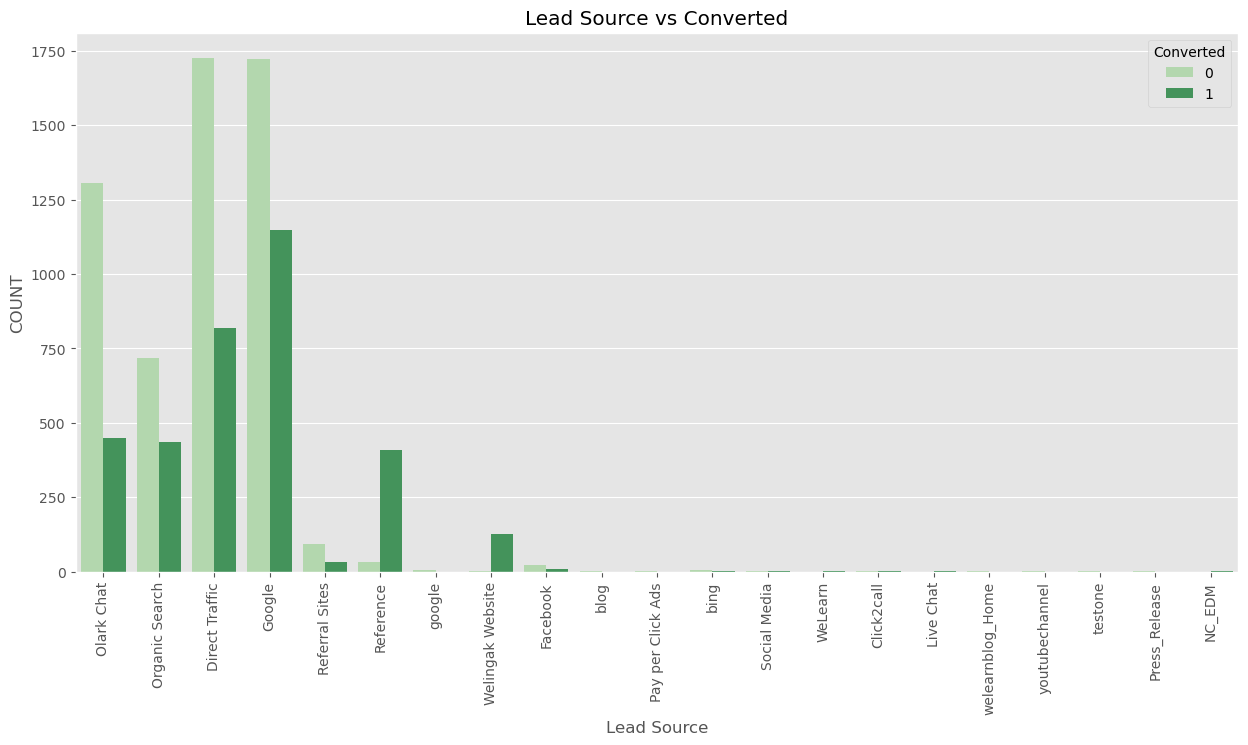

In [92]:
#Lets begin the analysis as we have enough converted and non converted data
#Plot graph with respect to Lead Source & Converted
plt.figure(figsize=(15,7))
sns.countplot(lead_data,x="Lead Source",hue="Converted",palette="Greens")
plt.xticks(rotation=90)
plt.title('Lead Source vs Converted')
plt.xlabel('Lead Source')
plt.ylabel('COUNT')
plt.show()

In the above graph, the lead count is too low or negligible for the values such as: blog, Pay per Click Ads, bing, Social Media, WeLearn, Click2call, Live Chat, welearnblog_Home, youtubechannel, testone, Press_Release, NC_EDM.
All these can be replaced to one value. Also Google & google are same, so let's make them together.

In [95]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_LeadSource')

lead_data['Lead Source'] = lead_data['Lead Source'].replace("google", 'Google')

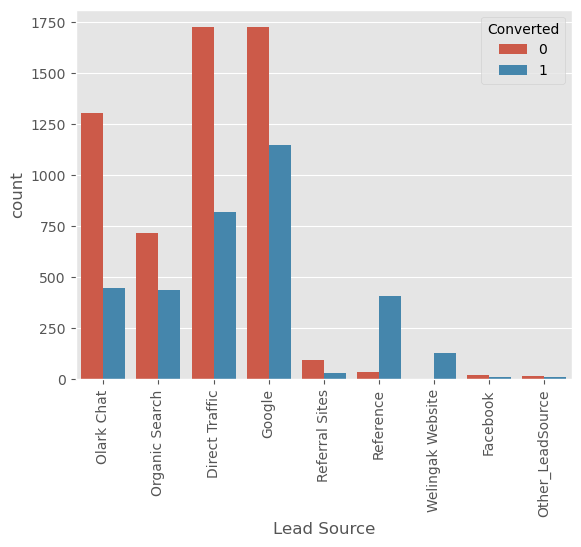

In [97]:
# Plotting Lead Source again

sns.countplot(x="Lead Source", hue="Converted", data= lead_data)
plt.xticks(rotation='vertical')
plt.show()

OBSERVATION:

Maximum Lead count is from Google and Direct Traffic.
The conversion count is maximum for Reference and Welingak Website.
To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the lead count from 'Reference' and 'Welingak Website'

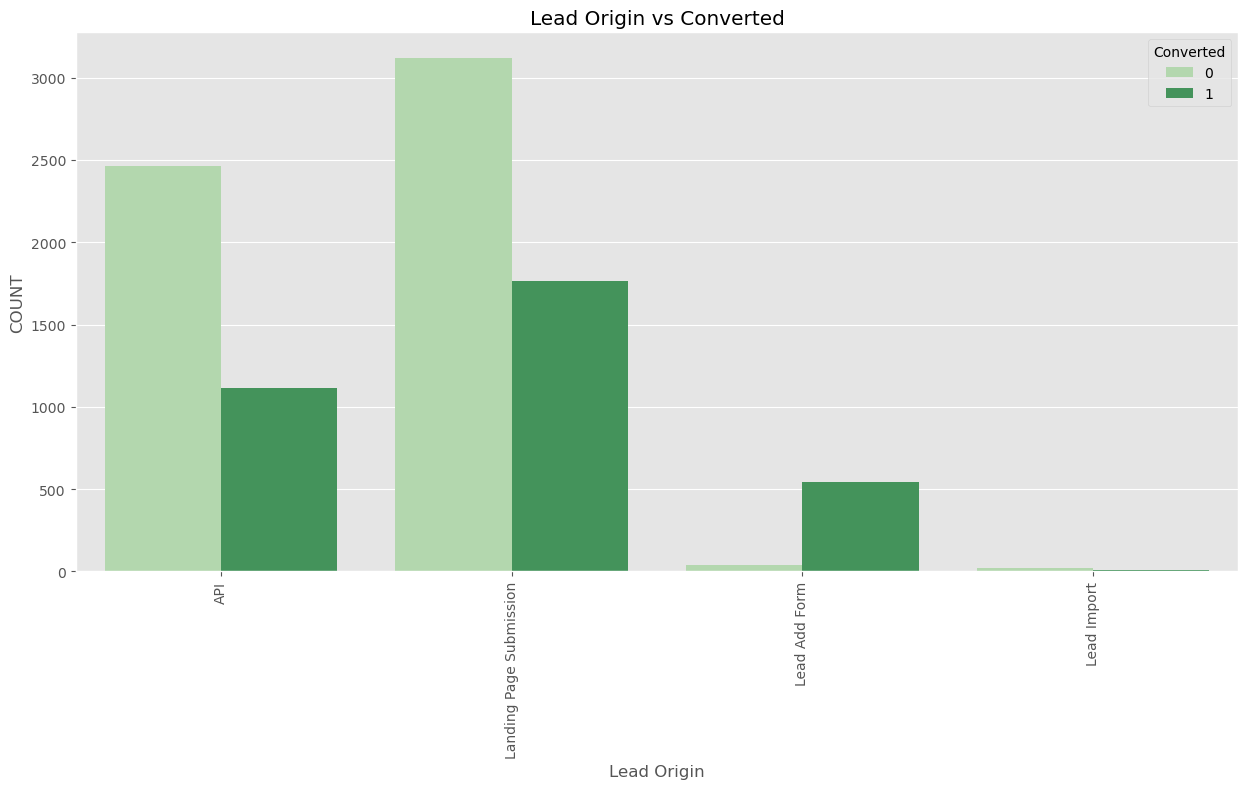

In [101]:
#Plot graph with respect to Lead Origin & Converted
plt.figure(figsize=(15,7))
sns.countplot(lead_data,x="Lead Origin",hue="Converted",palette="Greens")
plt.xticks(rotation=90)
plt.title('Lead Origin vs Converted')
plt.xlabel('Lead Origin')
plt.ylabel('COUNT')
plt.show()

OBSERVATIONS:

API and Landing Page Submission have more lead count but less conversion rate.
Lead conversion is more for Lead Add Form but the lead count is less.
Lead Import has very less count as well as conversion rate. So, can be ignored

CONCLUSION: Increase the lead conversion rate for API and Landing Page Submission and increase the lead count for Lead Add Form.

<Axes: >

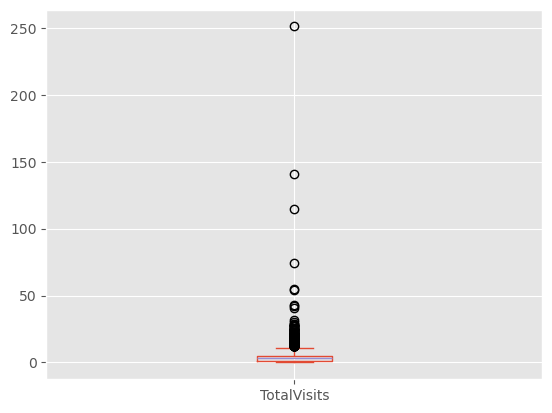

In [109]:
lead_data["TotalVisits"].plot.box()

There are more outliers in TotalVisits

<Axes: >

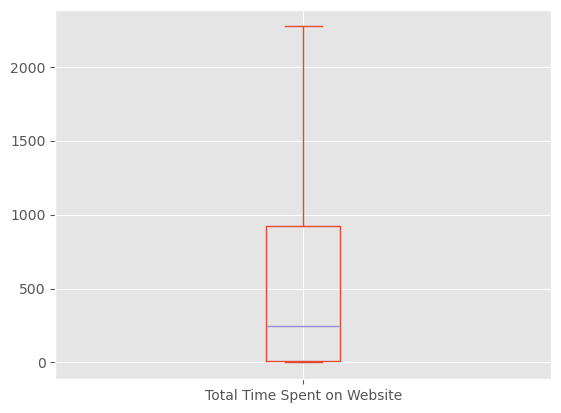

In [114]:
lead_data["Total Time Spent on Website"].plot.box()

In [116]:
# Cap the TotalVisits to 95 percentile

q1 = lead_data["TotalVisits"].quantile(0.95)
lead_data["TotalVisits"][lead_data["TotalVisits"] >= q1] = q1

Text(0.5, 1.0, 'TOTAL VISITS VS CONVERTED \n')

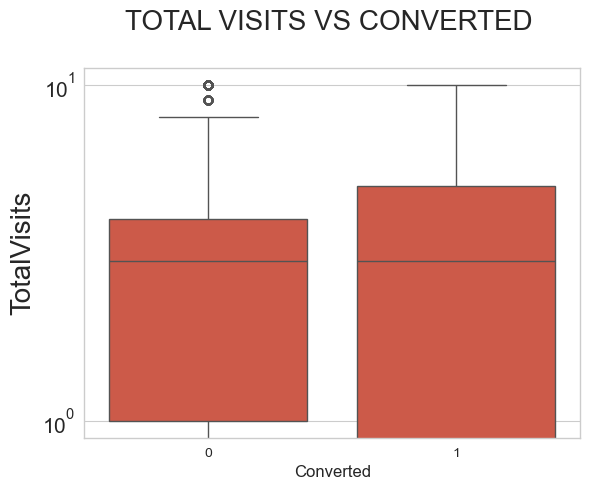

In [118]:
#Boxplot for TotalVisits
sns.set_style("whitegrid")

sns.boxplot(data= lead_data, x = 'Converted', y='TotalVisits')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('TotalVisits', fontsize=20)
plt.title('TOTAL VISITS VS CONVERTED \n', fontsize=20)

Text(0.5, 1.0, 'TIME SPEND IN WEBSITE VS CONVERTED \n')

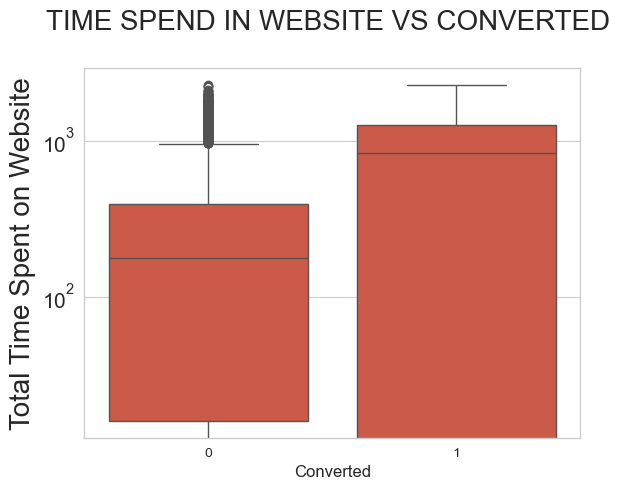

In [120]:
#Boxplot for TotalVisits
sns.set_style("whitegrid")

sns.boxplot(data= lead_data, x = 'Converted', y='Total Time Spent on Website')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Time Spent on Website', fontsize=20)
plt.title('TIME SPEND IN WEBSITE VS CONVERTED \n', fontsize=20)

OBSERVATION:

The median value is almost same for converted and non-cpnverted.

Users who spend more time in website has more chances to get converted. 

Conclusion: Websites should be more interactive and attractive with content.

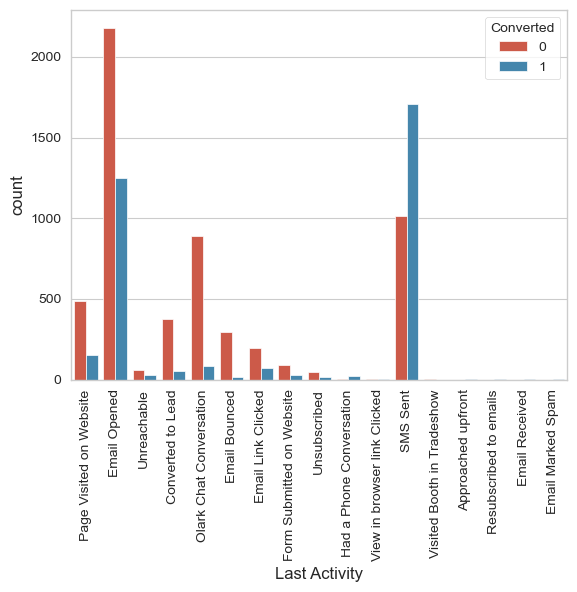

In [123]:
# Plotting the Last Activity again 

sns.countplot(x="Last Activity", hue="Converted", data= lead_data)
plt.xticks(rotation='vertical')
plt.show()

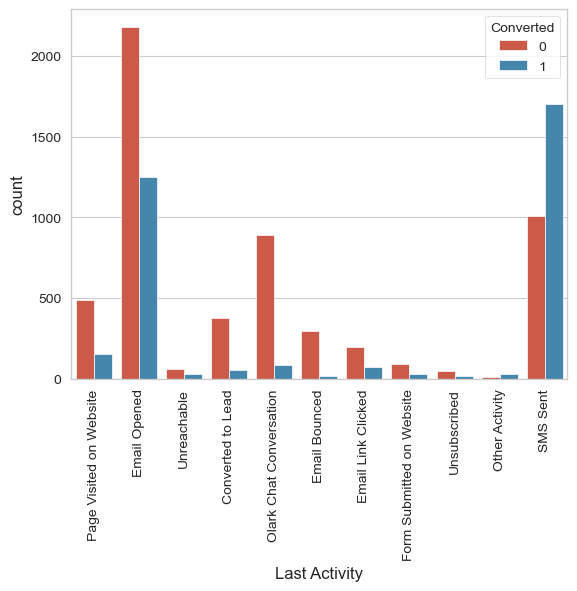

In [125]:
# Convert the low count categories to the 'Others' category
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= lead_data)
plt.xticks( rotation='vertical')
plt.show()

OBSERVATION:

'Email Opened' has the most lead count.
'SMS Sent' has most conversion rate.


CONCLUSION: Increase the conversion rate for 'Email Opened' and increase the lead count for 'SMS Sent'

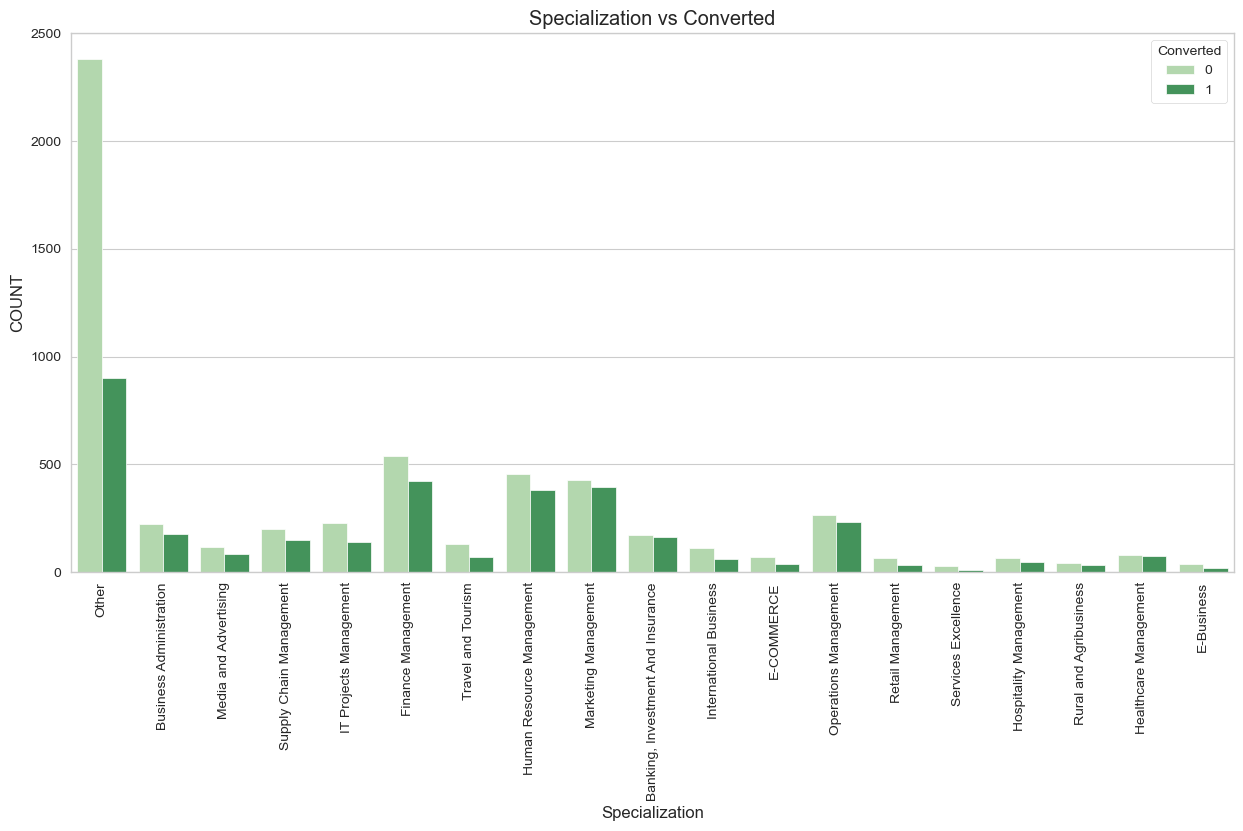

In [129]:
#Plot graph with respect to Specialization & Converted
plt.figure(figsize=(15,7))
sns.countplot(lead_data,x="Specialization",hue="Converted",palette="Greens")
plt.xticks(rotation=90)
plt.title('Specialization vs Converted')
plt.xlabel('Specialization')
plt.ylabel('COUNT')
plt.show()

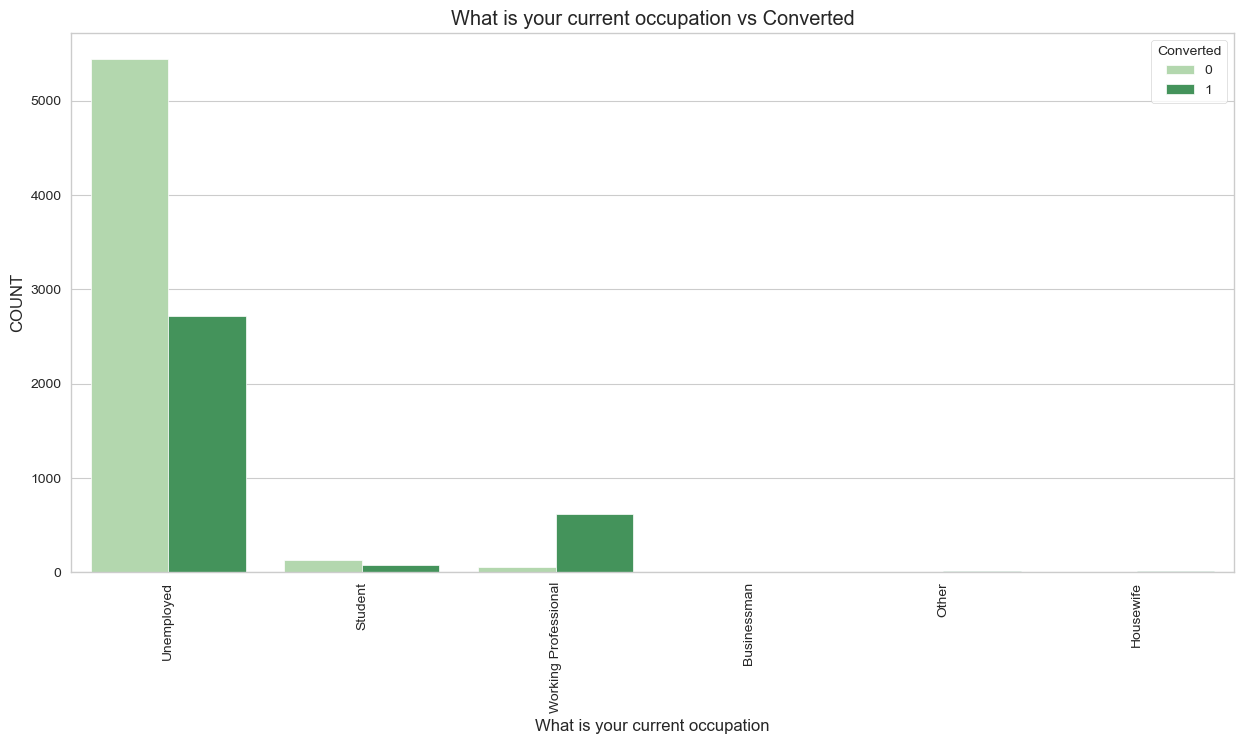

In [131]:
#Plot graph with respect to What is your current occupation & Converted
plt.figure(figsize=(15,7))
sns.countplot(lead_data,x="What is your current occupation",hue="Converted",palette="Greens")
plt.xticks(rotation=90)
plt.title('What is your current occupation vs Converted')
plt.xlabel('What is your current occupation')
plt.ylabel('COUNT')
plt.show()

OBSERVATION:

No specific conclusions can be made from Specialization plot.
In "What is your current occupation" plot, Working professionals have high conversion rate, as well as Unemployed group hav high lead count.
To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

'Country', 'What matters most to you in choosing a course', 'City' columns have most values corresponding to one value such as India for Country, Mumbai for city and hence there is no particular insights for these columns.

In [135]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace("Other", 'Other_Occupation')

In [137]:
lead_data[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

Search  Magazine  Newspaper Article  X Education Forums  \
count  9074.000000    9074.0        9074.000000         9074.000000   
mean      0.001543       0.0           0.000220            0.000110   
std       0.039251       0.0           0.014845            0.010498   
min       0.000000       0.0           0.000000            0.000000   
25%       0.000000       0.0           0.000000            0.000000   
50%       0.000000       0.0           0.000000            0.000000   
75%       0.000000       0.0           0.000000            0.000000   
max       1.000000       0.0           1.000000            1.000000   

         Newspaper  Digital Advertisement  Through Recommendations  \
count  9074.000000            9074.000000              9074.000000   
mean      0.000110               0.000441                 0.000771   
std       0.010498               0.020992                 0.027766   
min       0.000000               0.000000                 0.000000   
25%       0.000000               0.000000                 0.000000   
50%       0.000000               0.000000                 0.000000   
75%       0.000000               0.000000                 0.000000   
max       1.000000               1.000000                 1.000000   

       Update me on Supply Chain Content  Get updates on DM Content  \
count                             9074.0                     9074.0   
mean                                 0.0                        0.0   
std                                  0.0                        0.0   
min                                  0.0                        0.0   
25%                                  0.0                        0.0   
50%                                  0.0                        0.0   
75%                                  0.0                        0.0   
max                                  0.0                        0.0   

       I agree to pay the amount through cheque  \
count                                    9074.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

       A free copy of Mastering The Interview  
count                             9074.000000  
mean                                 0.318272  
std                                  0.465831  
min                                  0.000000  
25%                                  0.000000  
50%                                  0.000000  
75%                                  1.000000  
max                                  1.000000

We can clearly see that most values in the all the columns are 0 i.e. "No" and hence no inference can be made using these columns

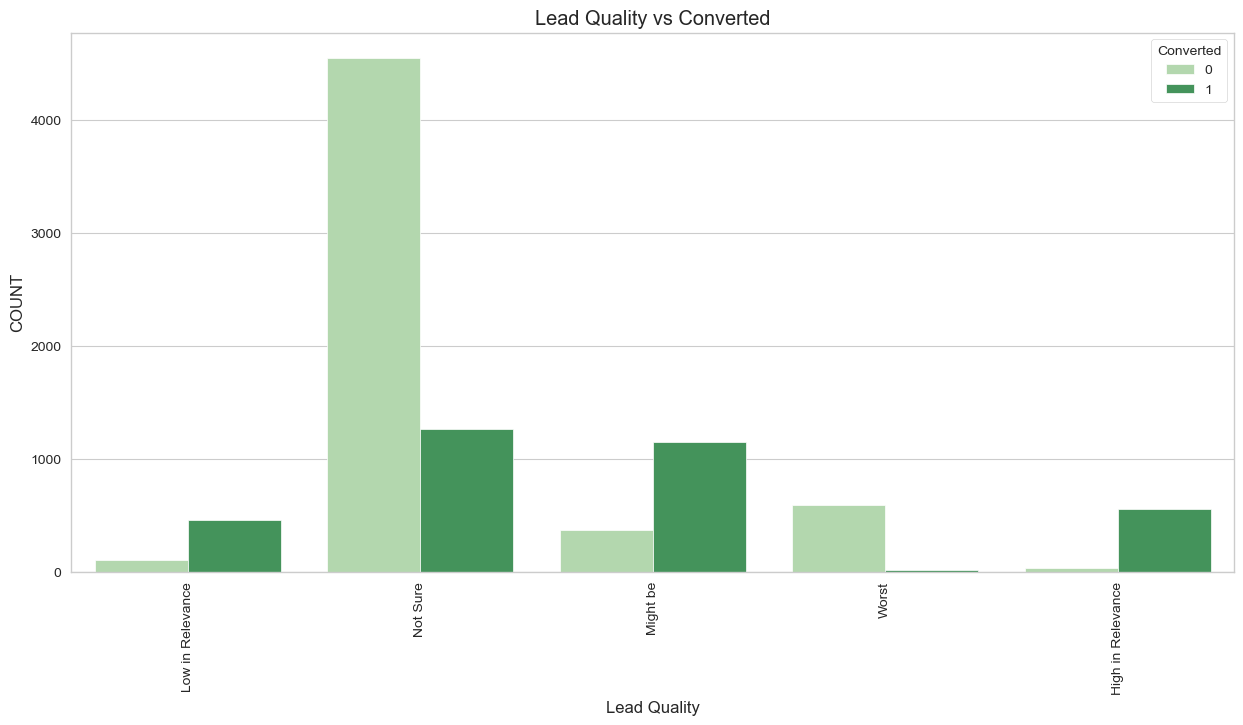

In [140]:
#Plot graph with respect to Lead Quality & Converted
plt.figure(figsize=(15,7))
sns.countplot(lead_data,x="Lead Quality",hue="Converted",palette="Greens")
plt.xticks(rotation=90)
plt.title('Lead Quality vs Converted')
plt.xlabel('Lead Quality')
plt.ylabel('COUNT')
plt.show()

Lead count is more for 'Note Sure', 'Worst'. Conversion rate is high for 'Might be' and 'Low in Relevance'

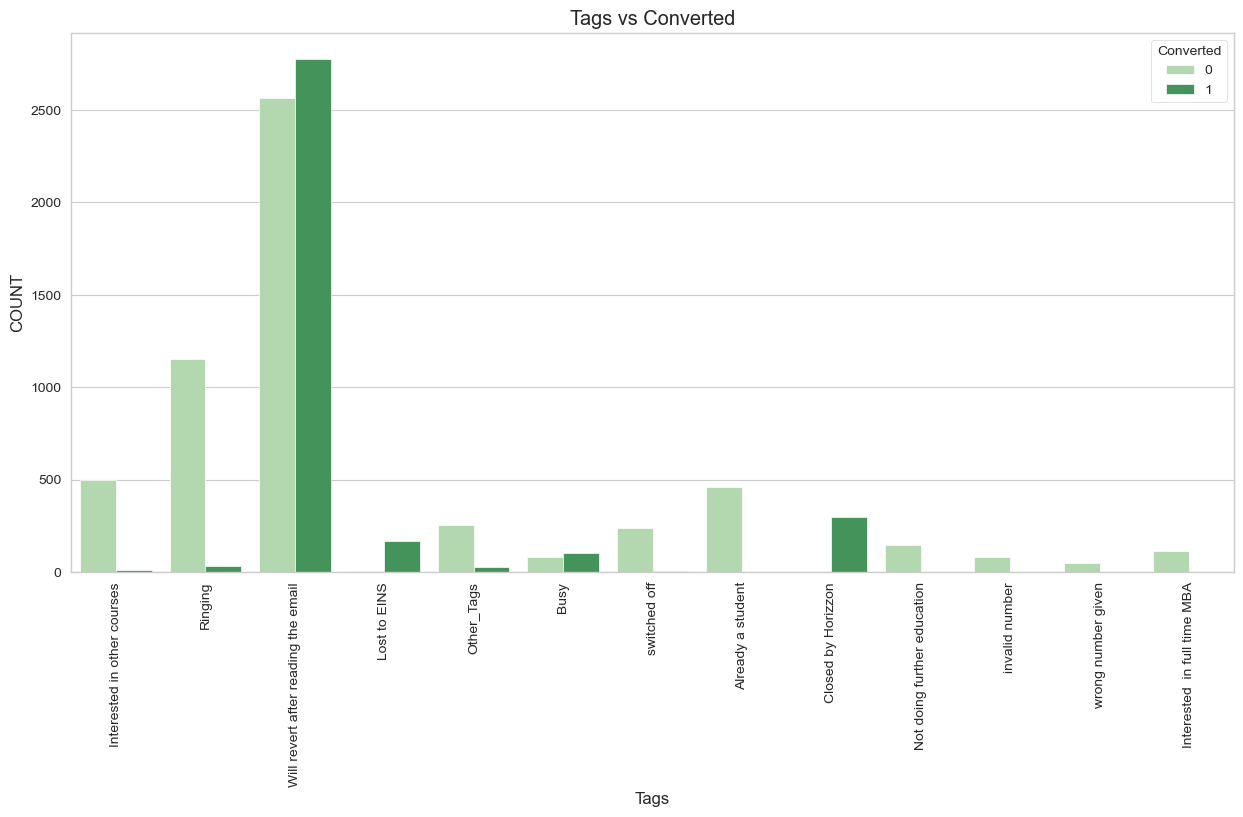

In [147]:
#Plot graph with respect to Tags & Converted
plt.figure(figsize=(15,7))
sns.countplot(lead_data,x="Tags",hue="Converted",palette="Greens")
plt.xticks(rotation=90)
plt.title('Tags vs Converted')
plt.xlabel('Tags')
plt.ylabel('COUNT')
plt.show()

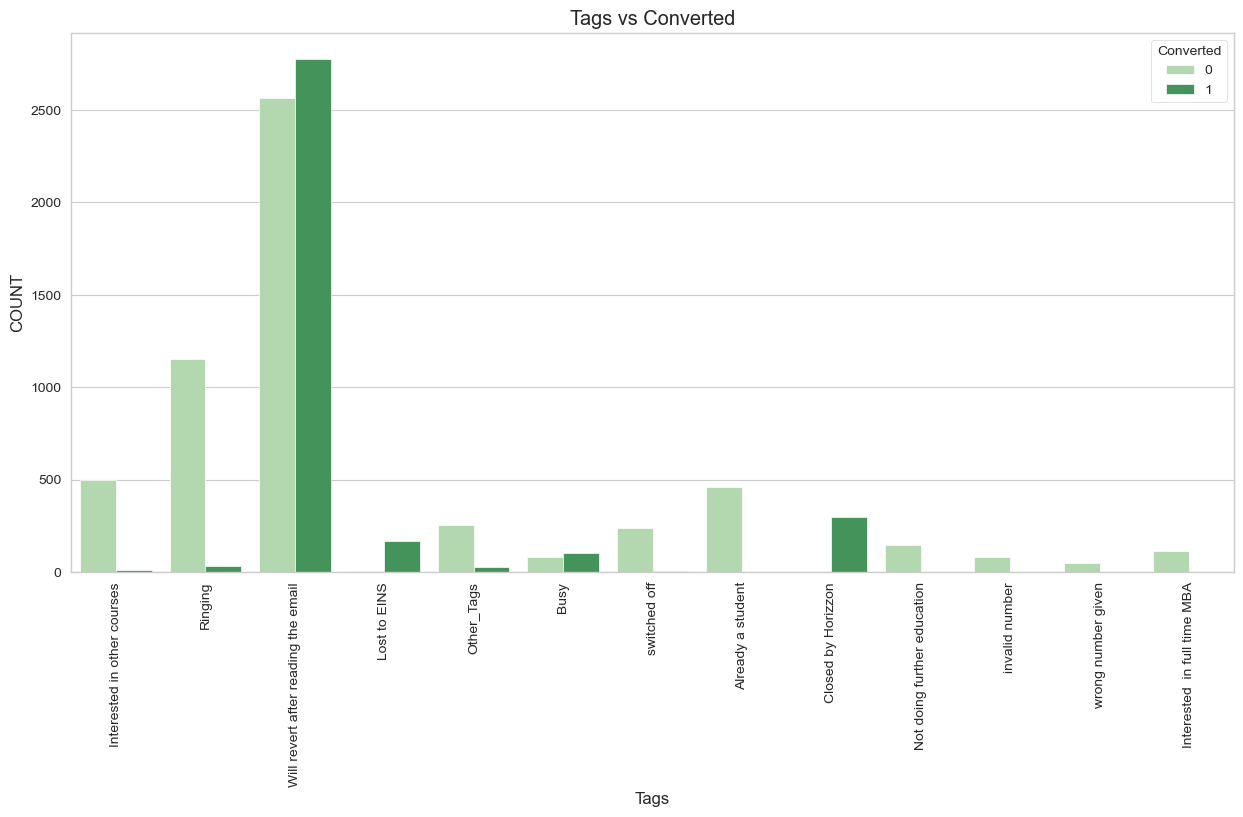

In [144]:
# Converting all low count categories to Others category
lead_data['Tags'] = lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

# lets plot the Tags again
plt.figure(figsize=(15,7))
sns.countplot(lead_data,x="Tags",hue="Converted",palette="Greens")
plt.xticks(rotation=90)
plt.title('Tags vs Converted')
plt.xlabel('Tags')
plt.ylabel('COUNT')
plt.show()

OBSERVATION:

'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate


SUMMARY:

We must concentrate on raising the conversion rate of "API" and "Landing Page Submission" Lead Origins as well as the quantity of leads from "Lead Add Form" in order to raise the overall lead conversion rate.

We must concentrate on raising the conversion rates of "Google," "Olark Chat," "Organic Search," and "Direct Traffic" in order to raise the overall lead conversion rate. We also need to increase the quantity of leads from "Reference" and "Welingak Website."

Enhancing the visual appeal of websites can help users spend more time on them.

By calling leads whose last activity was an email open, we can boost the conversion rate of those leads. We should also attempt to increase the number of leads whose last activity was an SMS sent.

We must increase the number of working professional leads by contacting them on various social media platforms, including LinkedIn, and we must also boost the conversion rate of unemployed leads in order to raise the overall conversion rate.

Additionally, we saw that several columns only contain data for one value. We can eliminate these columns from additional analysis because they don't support any conclusions.

In [150]:
# Dropping unnecessary columns

lead_data = lead_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],axis=1)

lead_data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                    Other                      Unemployed   
1                    Other                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                    Other                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

DUMMY VARIABLE CREATION

In [153]:
dummy_var = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy_var.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                    False                 False               False   
1                    False                 False               False   
2                    False                 False               False   
3                    False                 False               False   
4                    False                 False                True   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                    True                       False   
1                   False                        True   
2                   False                       False   
3                   False                       False   
4                   False                       False   

   Lead Source_Other_LeadSource  Lead Source_Reference  \
0                         False                  False   
1                         False                  False   
2                         False                  False   
3                         False                  False   
4                         False                  False   

   Lead Source_Referral Sites  ...  \
0                       False  ...   
1                       False  ...   
2                       False  ...   
3                       False  ...   
4                       False  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   Last Notable Activity_Had a Phone Conversation  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Last Notable Activity_Modified  \
0                            True   
1                           False   
2                           False   
3                            True   
4                            True   

   Last Notable Activity_Olark Chat Conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Page Visited on Website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Resubscribed to emails  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                           False                              False   
1                           False                              False   
2                           False                              False   
3                           False                              False   
4                           False                              False   

 

In [155]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)
lead_data.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  
0                            0                   0.0  
1                          674                   2.5  
2                         1532                   2.0  
3                          305                   1.0  
4                         1428                   1.0

In [157]:
lead_data = pd.concat([lead_data, dummy_var], axis=1)
lead_data.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  Lead Source_Facebook  ...  \
0                    False                 False  ...   
1                    False                 False  ...   
2                    False                 False  ...   
3                    False                 False  ...   
4                    False                 False  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   Last Notable Activity_Had a Phone Conversation  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Last Notable Activity_Modified  \
0                            True   
1                           False   
2                           False   
3                            True   
4                            True   

   Last Notable Activity_Olark Chat Conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Page Visited on Website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Resubscribed to emails  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                           False                              False   
1                           False                              False   
2                           False                              False   
3                           False                              False   
4                           False                              False   

   Last Notable Activity_Unsubscribed  \
0                               False   
1                               False   
2                               False   
3                               False   
4       

TEST AND TRAIN DATA SPLIT

In [160]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Do Not Email                                          9074 non-null   int64  
 2   Converted                                             9074 non-null   int64  
 3   TotalVisits                                           9074 non-null   float64
 4   Total Time Spent on Website                           9074 non-null   int64  
 5   Page Views Per Visit                                  9074 non-null   float64
 6   Lead Origin_Landing Page Submission                   9074 non-null   bool   
 7   Lead Origin_Lead Add Form                             9074 non-null   bool   
 8   Lead Origin_Lead Import                               9074 non-

In [162]:
#Let's create a copy of lead data set and all columns into int data type
lead_newdata = lead_data.copy()

In [164]:
#Convet to int data type
lead_newdata["Prospect ID"] = pd.to_numeric(lead_newdata["Prospect ID"], errors='coerce').astype('Int64')
lead_newdata["Lead Origin_Landing Page Submission"]=lead_newdata["Lead Origin_Landing Page Submission"].astype(int, errors="ignore")
lead_newdata["Lead Origin_Lead Add Form"]=lead_newdata["Lead Origin_Lead Add Form"].astype(int, errors="ignore")
lead_newdata["Lead Origin_Lead Import"]=lead_newdata["Lead Origin_Lead Import"].astype(int, errors="ignore")
lead_newdata["Lead Source_Facebook"]=lead_newdata["Lead Source_Facebook"].astype(int, errors="ignore")
lead_newdata["Lead Source_Google"]=lead_newdata["Lead Source_Google"].astype(int, errors="ignore")
lead_newdata["Lead Source_Olark Chat"]=lead_newdata["Lead Source_Olark Chat"].astype(int, errors="ignore")
lead_newdata["Lead Source_Organic Search"]=lead_newdata["Lead Source_Organic Search"].astype(int, errors="ignore")
lead_newdata["Lead Source_Other_LeadSource"]=lead_newdata["Lead Source_Other_LeadSource"].astype(int, errors="ignore")
lead_newdata["Lead Source_Reference"]=lead_newdata["Lead Source_Reference"].astype(int, errors="ignore")
lead_newdata["Lead Source_Referral Sites"]=lead_newdata["Lead Source_Referral Sites"].astype(int, errors="ignore")
lead_newdata["Lead Source_Welingak Website"]=lead_newdata["Lead Source_Welingak Website"].astype(int, errors="ignore")
lead_newdata["Last Activity_Email Bounced"]=lead_newdata["Last Activity_Email Bounced"].astype(int, errors="ignore")
lead_newdata["Last Activity_Email Link Clicked"]=lead_newdata["Last Activity_Email Link Clicked"].astype(int, errors="ignore")
lead_newdata["Last Activity_Email Opened"]=lead_newdata["Last Activity_Email Opened"].astype(int, errors="ignore")
lead_newdata["Last Activity_Form Submitted on Website"]=lead_newdata["Last Activity_Form Submitted on Website"].astype(int, errors="ignore")
lead_newdata["Last Activity_Olark Chat Conversation"]=lead_newdata["Last Activity_Olark Chat Conversation"].astype(int, errors="ignore")
lead_newdata["Last Activity_Other Activity"]=lead_newdata["Last Activity_Other Activity"].astype(int, errors="ignore")
lead_newdata["Last Activity_Page Visited on Website"]=lead_newdata["Last Activity_Page Visited on Website"].astype(int, errors="ignore")
lead_newdata["Last Activity_SMS Sent"]=lead_newdata["Last Activity_SMS Sent"].astype(int, errors="ignore")
lead_newdata["Last Activity_Unreachable"]=lead_newdata["Last Activity_Unreachable"].astype(int, errors="ignore")
lead_newdata["Last Activity_Unsubscribed"]=lead_newdata["Last Activity_Unsubscribed"].astype(int, errors="ignore")
lead_newdata["Specialization_Business Administration"]=lead_newdata["Specialization_Business Administration"].astype(int, errors="ignore")
lead_newdata["Specialization_E-Business"]=lead_newdata["Specialization_E-Business"].astype(int, errors="ignore")
lead_newdata["Specialization_E-COMMERCE"]=lead_newdata["Specialization_E-COMMERCE"].astype(int, errors="ignore")
lead_newdata["Specialization_Finance Management"]=lead_newdata["Specialization_Finance Management"].astype(int, errors="ignore")
lead_newdata["Specialization_Healthcare Management"]=lead_newdata["Specialization_Healthcare Management"].astype(int, errors="ignore")
lead_newdata["Specialization_Hospitality Management"]=lead_newdata["Specialization_Hospitality Management"].astype(int, errors="ignore")
lead_newdata["Specialization_Human Resource Management"]=lead_newdata["Specialization_Human Resource Management"].astype(int, errors="ignore")
lead_newdata["Specialization_IT Projects Management"]=lead_newdata["Specialization_IT Projects Management"].astype(int, errors="ignore")
lead_newdata["Specialization_International Business"]=lead_newdata["Specialization_International Business"].astype(int, errors="ignore")
lead_newdata["Specialization_Marketing Management"]=lead_newdata["Specialization_Marketing Management"].astype(int, errors="ignore")
lead_newdata["Specialization_Media and Advertising"]=lead_newdata["Specialization_Media and Advertising"].astype(int, errors="ignore")
lead_newdata["Specialization_Operations Management"]=lead_newdata["Specialization_Operations Management"].astype(int, errors="ignore")
lead_newdata["Specialization_Other"]=lead_newdata["Specialization_Other"].astype(int, errors="ignore")
lead_newdata["Specialization_Retail Management"]=lead_newdata["Specialization_Retail Management"].astype(int, errors="ignore")
lead_newdata["Specialization_Rural and Agribusiness"]=lead_newdata["Specialization_Rural and Agribusiness"].astype(int, errors="ignore")
lead_newdata["Specialization_Services Excellence"]=lead_newdata["Specialization_Services Excellence"].astype(int, errors="ignore")
lead_newdata["Specialization_Supply Chain Management"]=lead_newdata["Specialization_Supply Chain Management"].astype(int, errors="ignore")
lead_newdata["Specialization_Travel and Tourism"]=lead_newdata["Specialization_Travel and Tourism"].astype(int, errors="ignore")
lead_newdata["What is your current occupation_Housewife"]=lead_newdata["What is your current occupation_Housewife"].astype(int, errors="ignore")
lead_newdata["What is your current occupation_Other_Occupation"]=lead_newdata["What is your current occupation_Other_Occupation"].astype(int, errors="ignore")
lead_newdata["What is your current occupation_Student"]=lead_newdata["What is your current occupation_Student"].astype(int, errors="ignore")
lead_newdata["What is your current occupation_Unemployed"]=lead_newdata["What is your current occupation_Unemployed"].astype(int, errors="ignore")
lead_newdata["What is your current occupation_Working Professional"]=lead_newdata["What is your current occupation_Working Professional"].astype(int, errors="ignore")
lead_newdata["Tags_Busy"]=lead_newdata["Tags_Busy"].astype(int, errors="ignore")
lead_newdata["Tags_Closed by Horizzon"]=lead_newdata["Tags_Closed by Horizzon"].astype(int, errors="ignore")
lead_newdata["Tags_Interested  in full time MBA"]=lead_newdata["Tags_Interested  in full time MBA"].astype(int, errors="ignore")
lead_newdata["Tags_Interested in other courses"]=lead_newdata["Tags_Interested in other courses"].astype(int, errors="ignore")
lead_newdata["Tags_Lost to EINS"]=lead_newdata["Tags_Lost to EINS"].astype(int, errors="ignore")
lead_newdata["Tags_Not doing further education"]=lead_newdata["Tags_Not doing further education"].astype(int, errors="ignore")
lead_newdata["Tags_Other_Tags"]=lead_newdata["Tags_Other_Tags"].astype(int, errors="ignore")
lead_newdata["Tags_Ringing"]=lead_newdata["Tags_Ringing"].astype(int, errors="ignore")
lead_newdata["Tags_Will revert after reading the email"]=lead_newdata["Tags_Will revert after reading the email"].astype(int, errors="ignore")
lead_newdata["Tags_invalid number"]=lead_newdata["Tags_invalid number"].astype(int, errors="ignore")
lead_newdata["Tags_switched off"]=lead_newdata["Tags_switched off"].astype(int, errors="ignore")
lead_newdata["Tags_wrong number given"]=lead_newdata["Tags_wrong number given"].astype(int, errors="ignore")
lead_newdata["Lead Quality_Low in Relevance"]=lead_newdata["Lead Quality_Low in Relevance"].astype(int, errors="ignore")
lead_newdata["Lead Quality_Might be"]=lead_newdata["Lead Quality_Might be"].astype(int, errors="ignore")
lead_newdata["Lead Quality_Not Sure"]=lead_newdata["Lead Quality_Not Sure"].astype(int, errors="ignore")
lead_newdata["Lead Quality_Worst"]=lead_newdata["Lead Quality_Worst"].astype(int, errors="ignore")
lead_newdata["City_Other Cities"]=lead_newdata["City_Other Cities"].astype(int, errors="ignore")
lead_newdata["City_Other Cities of Maharashtra"]=lead_newdata["City_Other Cities of Maharashtra"].astype(int, errors="ignore")
lead_newdata["City_Other Metro Cities"]=lead_newdata["City_Other Metro Cities"].astype(int, errors="ignore")
lead_newdata["City_Thane & Outskirts"]=lead_newdata["City_Thane & Outskirts"].astype(int, errors="ignore")
lead_newdata["City_Tier II Cities"]=lead_newdata["City_Tier II Cities"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Email Bounced"]=lead_newdata["Last Notable Activity_Email Bounced"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Email Link Clicked"]=lead_newdata["Last Notable Activity_Email Link Clicked"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Email Marked Spam"]=lead_newdata["Last Notable Activity_Email Marked Spam"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Email Opened"]=lead_newdata["Last Notable Activity_Email Opened"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Email Received"]=lead_newdata["Last Notable Activity_Email Received"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Form Submitted on Website"]=lead_newdata["Last Notable Activity_Form Submitted on Website"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Had a Phone Conversation"]=lead_newdata["Last Notable Activity_Had a Phone Conversation"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Modified"]=lead_newdata["Last Notable Activity_Modified"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Olark Chat Conversation"]=lead_newdata["Last Notable Activity_Olark Chat Conversation"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Page Visited on Website"]=lead_newdata["Last Notable Activity_Page Visited on Website"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Resubscribed to emails"]=lead_newdata["Last Notable Activity_Resubscribed to emails"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_SMS Sent"]=lead_newdata["Last Notable Activity_SMS Sent"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Unreachable"]=lead_newdata["Last Notable Activity_Unreachable"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_Unsubscribed"]=lead_newdata["Last Notable Activity_Unsubscribed"].astype(int, errors="ignore")
lead_newdata["Last Notable Activity_View in browser link Clicked"]=lead_newdata["Last Notable Activity_View in browser link Clicked"].astype(int, errors="ignore")


In [166]:
#Check the conversion of dataset
lead_newdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           0 non-null      Int64  
 1   Do Not Email                                          9074 non-null   int64  
 2   Converted                                             9074 non-null   int64  
 3   TotalVisits                                           9074 non-null   float64
 4   Total Time Spent on Website                           9074 non-null   int64  
 5   Page Views Per Visit                                  9074 non-null   float64
 6   Lead Origin_Landing Page Submission                   9074 non-null   int32  
 7   Lead Origin_Lead Add Form                             9074 non-null   int32  
 8   Lead Origin_Lead Import                               9074 non-

In [168]:
# Putting feature variable to X
X = lead_newdata.drop(['Prospect ID','Converted'], axis=1)
# Putting response variable to y
y = lead_newdata['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  Lead Source_Olark Chat  ...  \
0                   0                       1  ...   
1                   0                       0  ...   
2                   0                       0  ...   
3                   0                       0  ...   
4                   1                       0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4            

In [170]:
# Splitt the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

FEATURE SCALING

In [173]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.432779                    -0.160255   
1012             1    -0.432779                    -0.540048   
9226             0    -1.150329                    -0.888650   
4750             0    -0.432779                     1.643304   
7987             0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.179666                                    1   
1012             -0.179666                                    1   
9226             -1.132538                                    0   
4750             -0.179666                                    1   
7987              0.058552                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  ...  \
3009                     0                   0                       0  ...   
1012                     0                   0                       0  ...   
9226                     0                   0                       1  ...   
4750                     0                   0                       0  ...   
7987                     0                   0                       0  ...   

      Last Notable Activity_Form Submitted on Website  \
3009                                                0   
1012                                                0   
9226                                                0   
4750                                                0   
7987                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3009                                               0   
1012                                               0   
9226                                               0   
4750                                               0   
7987                                               0   

      Last Notable Activity_Modified  \
3009                               0   
1012                               0   
9226                               1   
4750                               0   
7987                               1   

      Last Notable Activity_Olark Chat Conversation  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Page Visited on Website  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Resubscribed to emails  \
3009                                             0   
1012                                             0   
9226                                             0   
4750                                             0   
7987                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3009                               0                                  0   
1012                               0                                  0   
9226                               0                                  0   
4750                               1                                  0   
7987                               0                                  0   

      Last Notable Acti

In [175]:
#Check the Conversion Rate

print("Conversion rate is ", (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100)

Conversion rate is  37.85541106458012


 CORRELATIONS

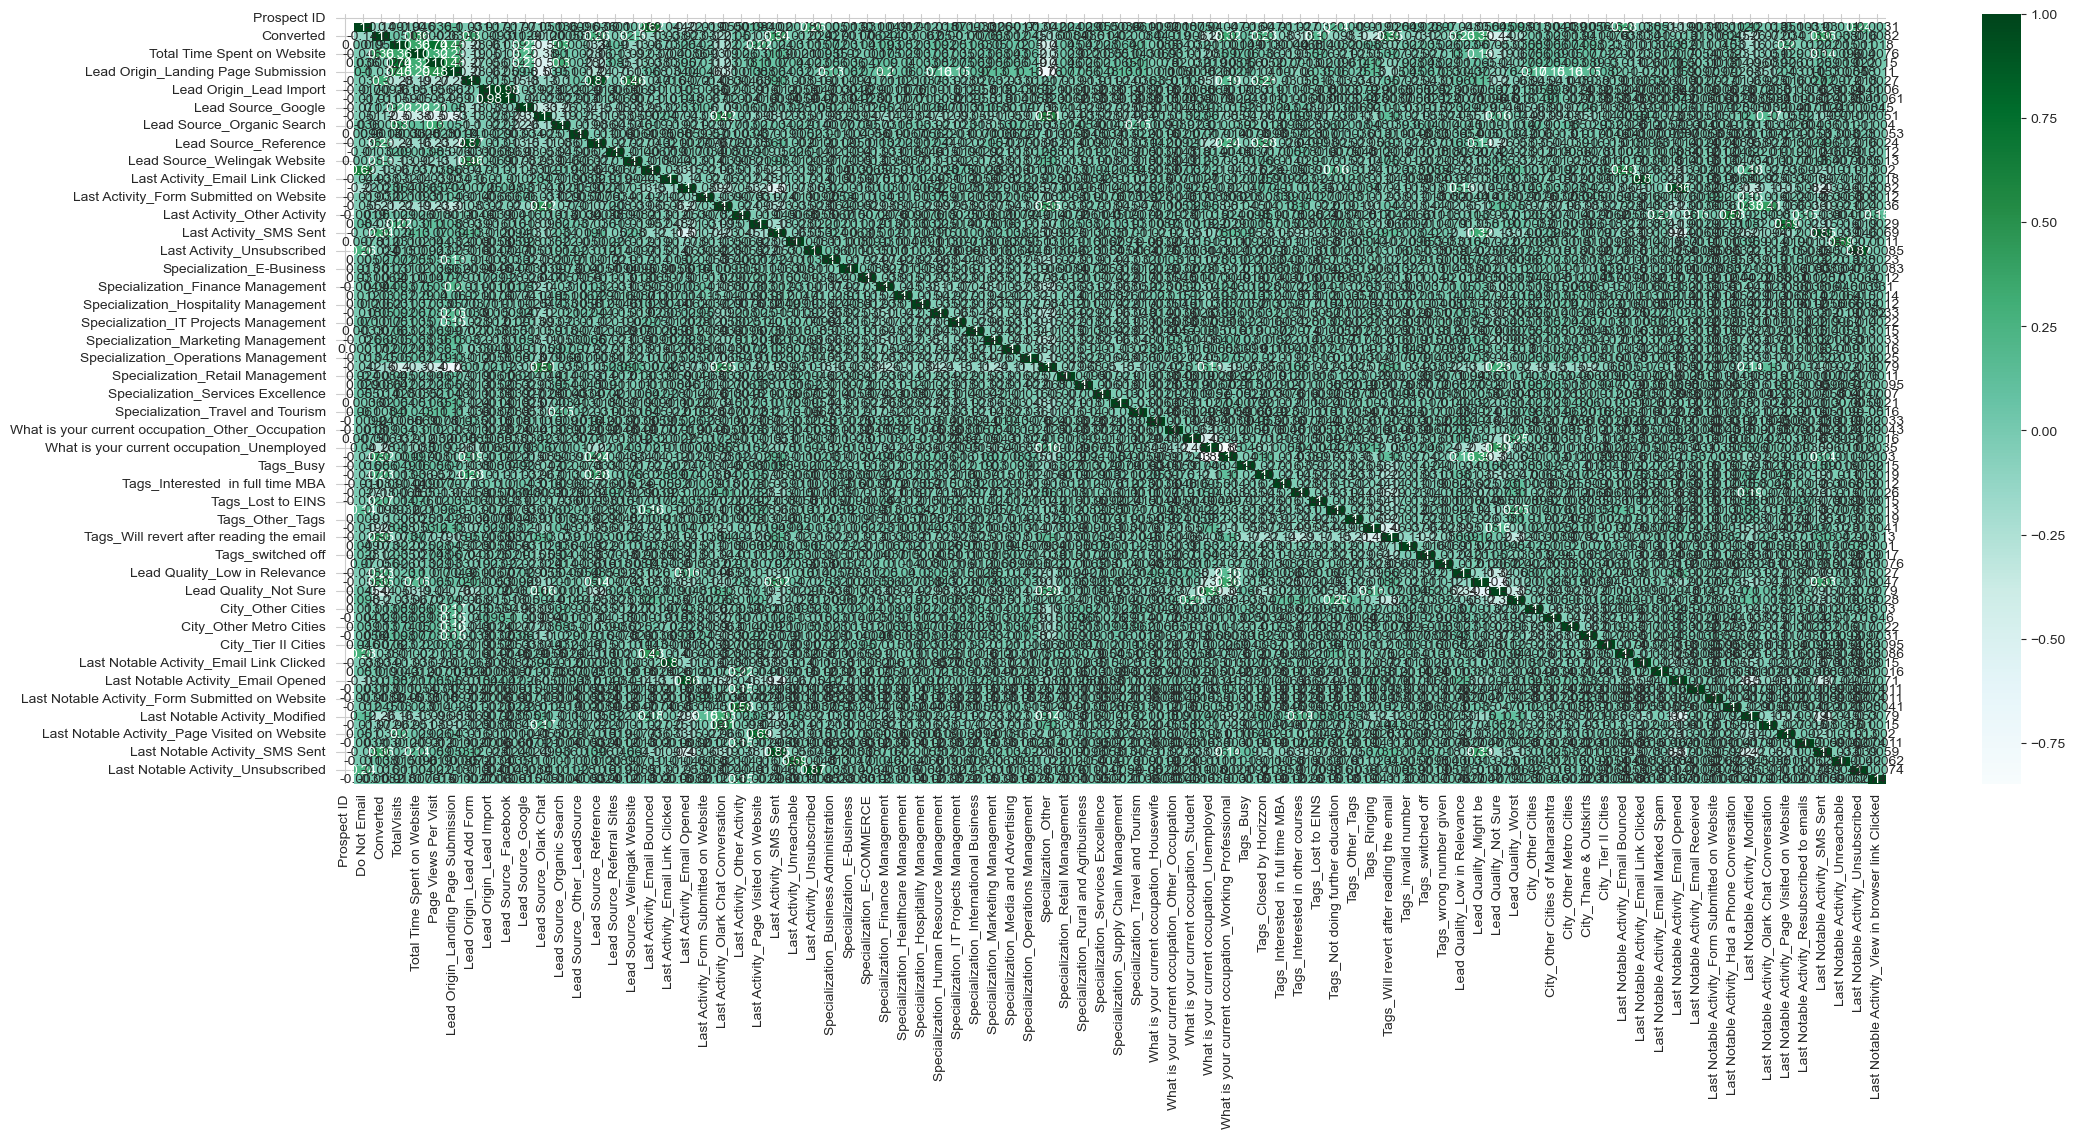

In [182]:
# Correlation between different numerical variables for both the Converted and not-converted cases
plt.figure(figsize=(25,10))
sns.heatmap(lead_newdata.corr(), cmap='BuGn', annot=True)
plt.show()

In [184]:
#Top correlations
target_corr = lead_newdata.iloc[0:, 2:].corr()
target_corr

Converted  TotalVisits  \
Converted                                            1.000000     0.050742   
TotalVisits                                          0.050742     1.000000   
Total Time Spent on Website                          0.359261     0.361207   
Page Views Per Visit                                 0.000260     0.737996   
Lead Origin_Landing Page Submission                 -0.037481     0.454350   
...                                                       ...          ...   
Last Notable Activity_Resubscribed to emails         0.013451    -0.012052   
Last Notable Activity_SMS Sent                       0.360233     0.021815   
Last Notable Activity_Unreachable                    0.037893     0.015285   
Last Notable Activity_Unsubscribed                  -0.016286     0.010927   
Last Notable Activity_View in browser link Clicked  -0.008194     0.018154   

                                                    Total Time Spent on Website  \
Converted                                                              0.359261   
TotalVisits                                                            0.361207   
Total Time Spent on Website                                            1.000000   
Page Views Per Visit                                                   0.318350   
Lead Origin_Landing Page Submission                                    0.292571   
...                                                                         ...   
Last Notable Activity_Resubscribed to emails                          -0.009298   
Last Notable Activity_SMS Sent                                         0.137169   
Last Notable Activity_Unreachable                                      0.009594   
Last Notable Activity_Unsubscribed                                     0.003951   
Last Notable Activity_View in browser link Clicked                    -0.007584   

                                                    Page Views Per Visit  \
Converted                                                       0.000260   
TotalVisits                                                     0.737996   
Total Time Spent on Website                                     0.318350   
Page Views Per Visit                                            1.000000   
Lead Origin_Landing Page Submission                             0.484119   
...                                                                  ...   
Last Notable Activity_Resubscribed to emails                   -0.011516   
Last Notable Activity_SMS Sent                                  0.059445   
Last Notable Activity_Unreachable                               0.019415   
Last Notable Activity_Unsubscribed                              0.021668   
Last Notable Activity_View in browser link Clicked              0.001457   

                                                    Lead Origin_Landing Page Submission  \
Converted                                                                     -0.037481   
TotalVisits                                                                    0.454350   
Total Time Spent on Website                                                    0.292571   
Page Views Per Visit                                                           0.484119   
Lead Origin_Landing Page Submission                                            1.000000   
...                                                                                 ...   
Last Notable Activity_Resubscribed to emails                                  -0.011337   
Last Notable Activity_SMS Sent                                                 0.052736   
Last Notable Activity_Unreachable                                             -0.000847   
Last Notable Activity_Unsubscribed                                             0.018171   
Last Notable Activity_View in browser link Clicked                            -0.011337   

                                                    Lead Origin_Lead Add Form  \
Converted                      

In [186]:
#convert negative to positive values and sort
correl_0= target_corr.abs().unstack().sort_values(kind= 'quicksort').dropna()
correl_0= correl_0[correl_0 != 1.0]
correl_0

Specialization_Travel and Tourism        Last Notable Activity_Unsubscribed         0.000019
Last Notable Activity_Unsubscribed       Specialization_Travel and Tourism          0.000019
Specialization_International Business    What is your current occupation_Student    0.000024
What is your current occupation_Student  Specialization_International Business      0.000024
Last Activity_Unreachable                Specialization_Travel and Tourism          0.000027
                                                                                      ...   
Lead Source_Reference                    Lead Origin_Lead Add Form                  0.866191
Last Activity_Unsubscribed               Last Notable Activity_Unsubscribed         0.872656
Last Notable Activity_Unsubscribed       Last Activity_Unsubscribed                 0.872656
Lead Source_Facebook                     Lead Origin_Lead Import                    0.983684
Lead Origin_Lead Import                  Lead Source_Facebook         

In [188]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], axis=1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], axis=1)

In [190]:
correl_0 = X_train.corr()

In [192]:
correl_0= target_corr.abs().unstack().sort_values(kind= 'quicksort').dropna()
correl_0= correl_0[correl_0 != 1.0]
correl_0

Specialization_Travel and Tourism        Last Notable Activity_Unsubscribed         0.000019
Last Notable Activity_Unsubscribed       Specialization_Travel and Tourism          0.000019
Specialization_International Business    What is your current occupation_Student    0.000024
What is your current occupation_Student  Specialization_International Business      0.000024
Last Activity_Unreachable                Specialization_Travel and Tourism          0.000027
                                                                                      ...   
Lead Source_Reference                    Lead Origin_Lead Add Form                  0.866191
Last Activity_Unsubscribed               Last Notable Activity_Unsubscribed         0.872656
Last Notable Activity_Unsubscribed       Last Activity_Unsubscribed                 0.872656
Lead Source_Facebook                     Lead Origin_Lead Import                    0.983684
Lead Origin_Lead Import                  Lead Source_Facebook         

MODEL BUILDING

In [195]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1275.8
Date:                Tue, 18 Mar 2025   Deviance:                       2551.6
Time:                        21:22:27   Pearson chi2:                 3.54e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6059
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0041      1.763      1.137      0.256      -1.451       5.460
Do Not Email                                            -1.3817      0.317     -4.362      0.000      -2.002      -0.761
TotalVisits                                              0.0695      0.085      0.815      0.415      -0.098       0.237
Total Time Spent on Website                              1.1466      0.063     18.110      0.000       1.022       1.271
Page Views Per Visit                                    -0.1212      0.085     -1.432      0.152      -0.287       0.045
Lead Origin_Landing Page Submission                     -1.0310      0.218     -4.722      0.000      -1.459      -0.603
Lead Origin_Lead Add Form                               -0.3581      1.310     -0.273      0.785      -2.926       2.210
Lead Origin_Lead Import                                  1.1699      0.820      1.427      0.154      -0.437       2.777
Lead Source_Google                                       0.1897      0.152      1.247      0.212      -0.108       0.488
Lead Source_Olark Chat                                   0.9961      0.227      4.385      0.000       0.551       1.441
Lead Source_Organic Search                               0.1893      0.206      0.917      0.359      -0.215       0.594
Lead Source_Other_LeadSource                             0.9457      0.829      1.140      0.254      -0.680       2.571
Lead Source_Reference                                    1.8298      1.367      1.339      0.181      -0.849       4.508
Lead Source_Referral Sites                              -0.1186      0.490     -0.242      0.809      -1.079       0.842
Lead Source_Welingak Website                             5.5399      1.508      3.674      0.000       2.584       8.496
Last Activity_Email Bounced                             -0.5811      0.880     -0.661      0.509      -2.305       1.143
Last Activity_Email Link Clicked                        -0.8403      0.458     -1.833      0.067      -1.739       0.058
Last Activity_Email Opened                              -0.4341      0.348     -1.249      0.212      -1.115       0.247
Last Activity_Form Submitted on Website                  0.1271      0.591      0.215      0.830      -1.031       1.285
Last Activity_Olark Chat Conversation                   -0.5769      0.392     -1.470      0.142      -1.346       0.192
Last Activity_Other Activity                             1.4306      1.186      1.207      0.228      -0.893       3.754
Last Activity_Page Visited on Website                   -0.4234      0.402     -1.054      0.292      -1.211       0.364
Last Activity_SMS Sent                                   1

FEATURE SELECTION BY RFE

In [198]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [200]:
# Starting with 15 features selected by RFE
# Then optimize the model further by inspecting VIF and p-value of the features

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 54),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 52),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 45),
 ('Lead Source_Other_LeadSource', False, 39),
 ('Lead Source_Reference', False, 55),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 27),
 ('Last Activity_Form Submitted on Website', False, 48),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Other Activity', False, 6),
 ('Last Activity_Page Visited on Website', False, 26),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 10),
 

In [202]:
col = X_train.columns[rfe.support_]

ASSESSING THE MODEL WITH STATS

In [205]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1543.7
Date:                Tue, 18 Mar 2025   Deviance:                       3087.3
Time:                        21:23:36   Pearson chi2:                 3.73e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5713
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1792      0.218     -5.399      0.000      -1.607      -0.751
Do Not Email                                            -1.2135      0.221     -5.495      0.000      -1.646      -0.781
Lead Source_Welingak Website                             4.1435      0.735      5.636      0.000       2.703       5.584
Last Activity_SMS Sent                                   1.9719      0.103     19.182      0.000       1.770       2.173
What is your current occupation_Working Professional     1.3633      0.293      4.660      0.000       0.790       1.937
Tags_Busy                                                3.4375      0.322     10.682      0.000       2.807       4.068
Tags_Closed by Horizzon                                  8.4930      0.770     11.030      0.000       6.984      10.002
Tags_Lost to EINS                                        9.4098      0.766     12.278      0.000       7.908      10.912
Tags_Ringing                                            -1.8980      0.332     -5.725      0.000      -2.548      -1.248
Tags_Will revert after reading the email                 3.6248      0.230     15.787      0.000       3.175       4.075
Tags_invalid number                                    -22.3554   1.34e+04     -0.002      0.999   -2.63e+04    2.63e+04
Tags_switched off                                       -2.4546      0.583     -4.207      0.000      -3.598      -1.311
Lead Quality_Not Sure                                   -3.3564      0.132    -25.480      0.000      -3.615      -3.098
Lead Quality_Worst                                      -3.8914      0.819     -4.751      0.000      -5.497      -2.286
Last Notable Activity_Modified                          -1.7147      0.108    -15.917      0.000      -1.926      -1.504
Last Notable Activity_Olark Chat Conversation           -1.2792      0.350     -3.657      0.000      -1.965      -0.594
========================================================================================================================
"""

In [207]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.286856
1012    0.318457
9226    0.002074
4750    0.742927
7987    0.994127
1281    0.988081
2880    0.286856
4971    0.705549
7536    0.920243
1248    0.002074
dtype: float64

In [209]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28685594, 0.31845664, 0.00207392, 0.74292696, 0.9941271 ,
       0.98808058, 0.28685594, 0.70554929, 0.92024307, 0.00207392])

In [211]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID
0        0      0.286856     3009
1        0      0.318457     1012
2        0      0.002074     9226
3        1      0.742927     4750
4        1      0.994127     7987

In [213]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID  predicted
0        0      0.286856     3009          0
1        0      0.318457     1012          0
2        0      0.002074     9226          0
3        1      0.742927     4750          1
4        1      0.994127     7987          1

In [215]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.920642418516769


CHECKING VIFs

In [218]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

                                             Features  \
11                              Lead Quality_Not Sure   
8            Tags_Will revert after reading the email   
13                     Last Notable Activity_Modified   
2                              Last Activity_SMS Sent   
7                                        Tags_Ringing   
3   What is your current occupation_Working Profes...   
0                                        Do Not Email   
12                                 Lead Quality_Worst   
4                                           Tags_Busy   
10                                  Tags_switched off   
5                             Tags_Closed by Horizzon   
6                                   Tags_Lost to EINS   
1                        Lead Source_Welingak Website   
14      Last Notable Activity_Olark Chat Conversation   
9                                 Tags_invalid number   

    Variance Inflation Factor  
11                       3.13  
8                      

In [220]:
col = col.drop('Tags_invalid number')
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [222]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1549.5
Date:                Tue, 18 Mar 2025   Deviance:                       3098.9
Time:                        21:24:23   Pearson chi2:                 3.64e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5705
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3454      0.219     -6.156      0.000      -1.774      -0.917
Do Not Email                                            -1.2059      0.220     -5.473      0.000      -1.638      -0.774
Lead Source_Welingak Website                             4.1414      0.735      5.636      0.000       2.701       5.582
Last Activity_SMS Sent                                   1.9466      0.102     19.052      0.000       1.746       2.147
What is your current occupation_Working Professional     1.3983      0.295      4.738      0.000       0.820       1.977
Tags_Busy                                                3.6109      0.321     11.261      0.000       2.982       4.239
Tags_Closed by Horizzon                                  8.6409      0.770     11.217      0.000       7.131      10.151
Tags_Lost to EINS                                        9.5553      0.767     12.462      0.000       8.052      11.058
Tags_Ringing                                            -1.7137      0.330     -5.197      0.000      -2.360      -1.067
Tags_Will revert after reading the email                 3.7871      0.230     16.481      0.000       3.337       4.237
Tags_switched off                                       -2.2659      0.582     -3.892      0.000      -3.407      -1.125
Lead Quality_Not Sure                                   -3.3480      0.131    -25.482      0.000      -3.605      -3.090
Lead Quality_Worst                                      -3.8770      0.820     -4.727      0.000      -5.485      -2.269
Last Notable Activity_Modified                          -1.7013      0.107    -15.826      0.000      -1.912      -1.491
Last Notable Activity_Olark Chat Conversation           -1.2809      0.350     -3.663      0.000      -1.966      -0.596
========================================================================================================================
"""

In [224]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID  predicted
0        0      0.287761     3009          0
1        0      0.328745     1012          0
2        0      0.002104     9226          0
3        1      0.738907     4750          1
4        1      0.993984     7987          1

In [226]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.9200125964415052


The accuracy is still looking the same.

Check the VIFs again

In [229]:
calculate_vif(X_train[col])

                                             Features  \
10                              Lead Quality_Not Sure   
8            Tags_Will revert after reading the email   
12                     Last Notable Activity_Modified   
2                              Last Activity_SMS Sent   
7                                        Tags_Ringing   
3   What is your current occupation_Working Profes...   
0                                        Do Not Email   
11                                 Lead Quality_Worst   
4                                           Tags_Busy   
9                                   Tags_switched off   
5                             Tags_Closed by Horizzon   
6                                   Tags_Lost to EINS   
1                        Lead Source_Welingak Website   
13      Last Notable Activity_Olark Chat Conversation   

    Variance Inflation Factor  
10                       3.07  
8                        2.83  
12                       1.69  
2               

Comment: All variables have good value of VIF and p-values. So need not drop any more variables and we can proceed with making predictions using this model only

In [232]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [234]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3756  149]
 [ 359 2087]]
Accuracy : 0.9200125964415052
Sensitivity : 0.8532297628781684
Specificity : 0.9618437900128041
Precision : 0.9333631484794276


(0.9200125964415052,
 0.8532297628781684,
 0.9618437900128041,
 0.9333631484794276)

PLOT ROC CURVE

In [237]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [239]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

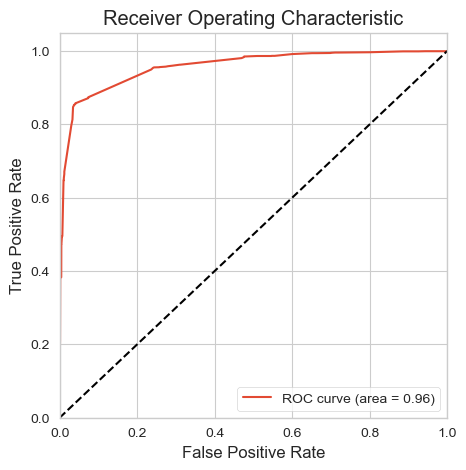

In [241]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

FIND OPTIMAL VALUE FOR CUT OFF

In [244]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        0      0.287761     3009          0    1    1    1    0    0    0   
1        0      0.328745     1012          0    1    1    1    1    0    0   
2        0      0.002104     9226          0    1    0    0    0    0    0   
3        1      0.738907     4750          1    1    1    1    1    1    1   
4        1      0.993984     7987          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    0    0  
4    1    1    1    1

In [246]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

lead_df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    lead_df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

lead_df

probability_score  accuracy_score  sensitivity_score  specificity_score  \
0.0                0.0        0.385136           1.000000           0.000000   
0.1                0.1        0.796253           0.962796           0.691933   
0.2                0.2        0.819556           0.957073           0.733419   
0.3                0.3        0.905999           0.874080           0.925992   
0.4                0.4        0.920013           0.856909           0.959539   
0.5                0.5        0.920013           0.853230           0.961844   
0.6                0.6        0.920800           0.852821           0.963380   
0.7                0.7        0.907731           0.813164           0.966965   
0.8                0.8        0.863486           0.664759           0.987964   
0.9                0.9        0.859865           0.653312           0.989245   

     precision_score  
0.0         0.385136  
0.1         0.661889  
0.2         0.692194  
0.3         0.880923  
0.4         0.929902  
0.5         0.933363  
0.6         0.935846  
0.7         0.939093  
0.8         0.971907  
0.9         0.974390

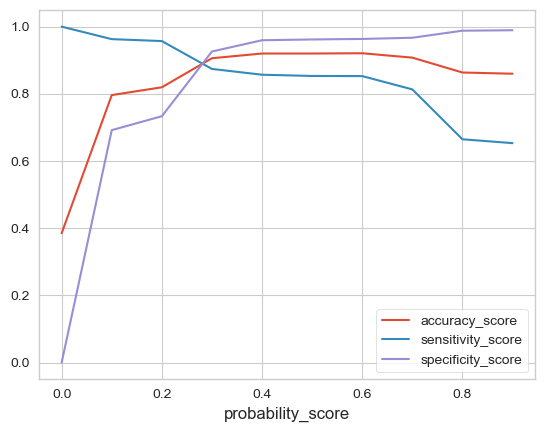

In [248]:
lead_df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

PRECISION AND RECALL TRADE OFF

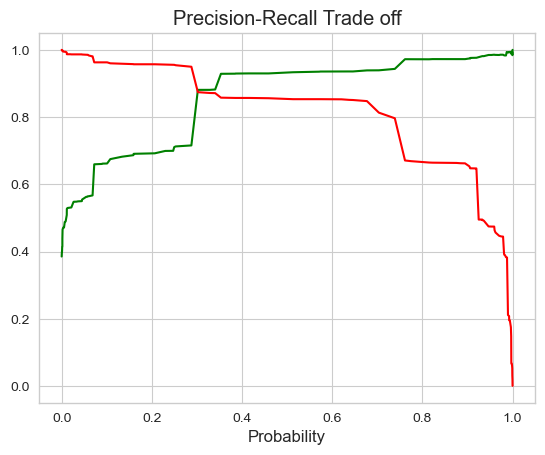

In [251]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

Comment:

In Sensitivity-Specificity-Accuracy plot 0.27 probability looks optimal. In Precision-Recall Curve 0.3 looks optimal.

We are taking 0.27 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [254]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

Convert  Convert_Prob  Pros_ID  Convert_predicted  Lead_Score
0        0      0.287761     3009                  1          29
1        0      0.328745     1012                  1          33
2        0      0.002104     9226                  0           0
3        1      0.738907     4750                  1          74
4        1      0.993984     7987                  1          99

In [256]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[2982  923]
 [ 123 2323]]
Accuracy : 0.8353015273185325
Sensitivity : 0.9497138184791496
Specificity : 0.7636363636363637
Precision : 0.7156500308071473


(0.8353015273185325,
 0.9497138184791496,
 0.7636363636363637,
 0.7156500308071473)

In [258]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

Converted  Prospect ID  Converting_Probability  final_predicted  Lead_Score
0          0         3271                0.287761                1          29
1          1         1490                0.978958                1          98
2          0         7936                0.287761                1          29
3          1         4216                0.996295                1         100
4          0         3830                0.287761                1          29

In [260]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[1302  432]
 [  70  919]]
Accuracy : 0.8156445097319134
Sensitivity : 0.9292214357937311
Specificity : 0.7508650519031141
Precision : 0.6802368615840119


(0.8156445097319134,
 0.9292214357937311,
 0.7508650519031141,
 0.6802368615840119)

FINAL MODEL

In [263]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [265]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.27)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.287761                  1          29
1         1012          0             0.328745                  1          33
2         9226          0             0.002104                  0           0
3         4750          1             0.738907                  1          74
4         7987          1             0.993984                  1          99
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.287761                  1          29
1         1490          1             0.978958                  1          98
2         7936          0             0.287761                  1          29
3         4216          1             0.996295                  1         100
4         3830          

Prospect ID  Converted  Convert_Probability  Convert_predicted  \
0            3271          0             0.287761                  1   
1            1490          1             0.978958                  1   
2            7936          0             0.287761                  1   
3            4216          1             0.996295                  1   
4            3830          0             0.287761                  1   
...           ...        ...                  ...                ...   
2718          850          0             0.068654                  0   
2719         2879          0             0.001668                  0   
2720         6501          1             0.987730                  1   
2721         7155          0             0.068654                  0   
2722          376          0             0.068654                  0   

      Lead_Score  
0             29  
1             98  
2             29  
3            100  
4             29  
...          ...  
2718           7  
2719           0  
2720          99  
2721           7  
2722           7  

[2723 rows x 5 columns]

In [267]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                                  -1.345369
Do Not Email                                           -1.205859
Lead Source_Welingak Website                            4.141354
Last Activity_SMS Sent                                  1.946574
What is your current occupation_Working Professional    1.398274
Tags_Busy                                               3.610899
Tags_Closed by Horizzon             

CONCLUSIONS:

The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.

Here, the logistic regression model is used to predict the probabilty of conversion of a customer.

Optimum cut off is chosen to be 0.27 i.e. any lead with greater than 0.27 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.27 or less probability of converting is predicted as Cold Lead (customer will not convert)

Our final Logistic Regression Model is built with 14 features.

Features used in final model are ['Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation']

The top three categorical/dummy variables in the final model are ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’, ‘Lead Quality_Worst’ with respect to the absolute value of their coefficient factors.

‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’ are obtained by encoding original categorical variable ‘Tags’. ‘Lead Quality_Worst’ is obtained by encoding the categorical variable ‘Lead Quality’.

Tags_Lost to EINS (Coefficient factor = 9.578632)

Tags_Closed by Horizzon (Coefficient factor = 8.555901)

Lead Quality_Worst (Coefficient factor =-3.943680)

The final model has Sensitivity of 0.928, this means the model is able to predict 92% customers out of all the converted customers, (Positive conversion) correctly.

The final model has Precision of 0.68, this means 68% of predicted hot leads are True Hot Leads.

We have also built an reusable code block which will predict Convert value and Lead Score given training, test data and a cut-off. Different cutoffs can be used depending on the use-cases (for eg. when high sensitivity is required, when model have optimum precision score etc.)